# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [2]:
df = pd.read_csv("train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Dataset Overview

In [5]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

In [ ]:
## Value counts for categorical features

In [8]:
print("\nSurvived counts:\n", df["Survived"].value_counts())
print("\nPclass counts:\n", df["Pclass"].value_counts())
print("\nEmbarked counts:\n", df["Embarked"].value_counts(dropna=False))


Survived counts:
 Survived
0    549
1    342
Name: count, dtype: int64

Pclass counts:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Embarked counts:
 Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


# Heatmap for visualization

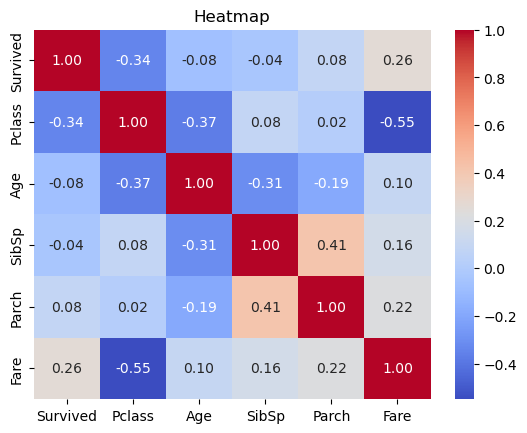

In [10]:
corr = df[["Survived","Pclass","Age","SibSp","Parch","Fare"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap")
plt.show()

# Pairplot for visualization

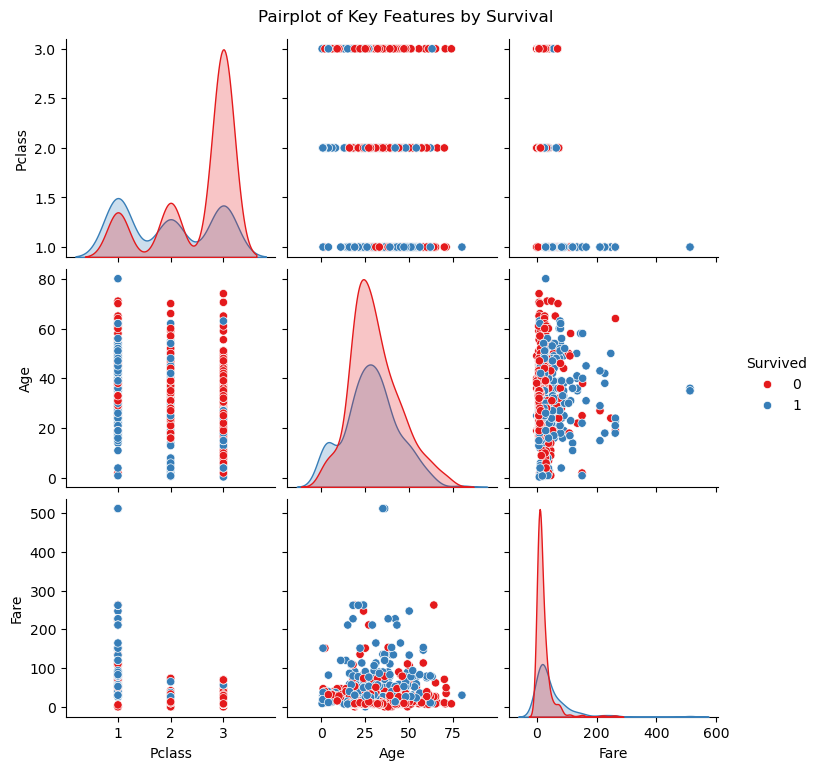

In [12]:
sns.pairplot(df[["Survived","Pclass","Age","Fare"]], hue="Survived", palette="Set1")
plt.suptitle("Pairplot of Key Features by Survival", y=1.02)
plt.show()

# Histogram 

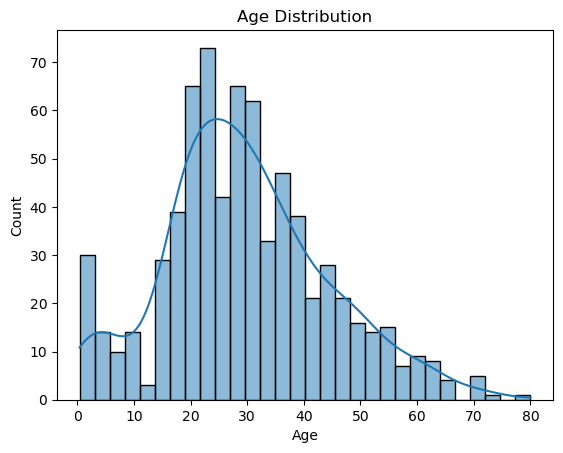

In [15]:
# Histogram – Age
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

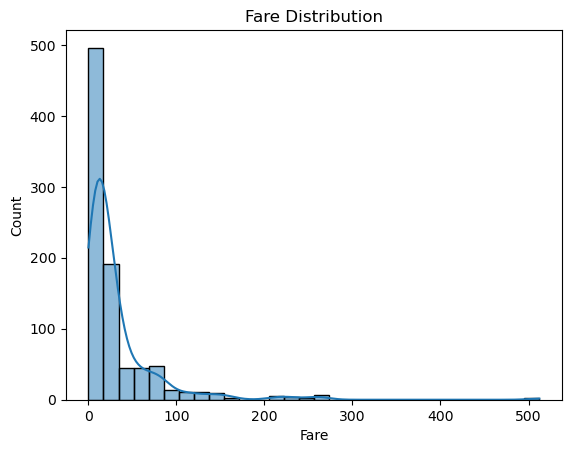

In [16]:
# Histogram – Fare

sns.histplot(df["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

# Barplot

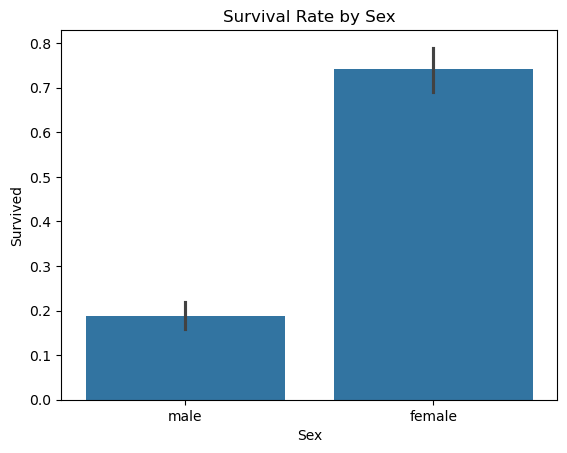

In [18]:
# Survival by Sex

sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Sex")
plt.show()

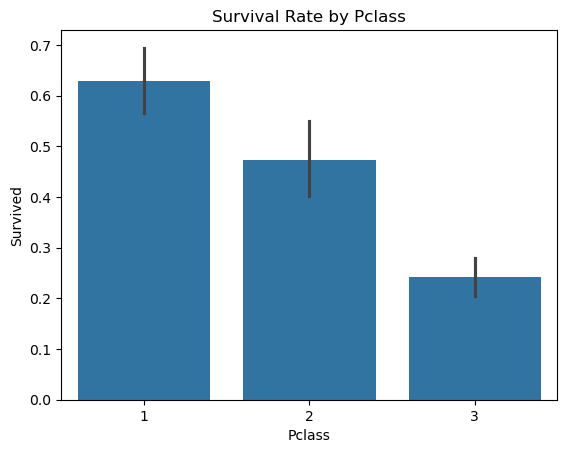

In [19]:
# Survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Pclass")
plt.show()

# Boxplot

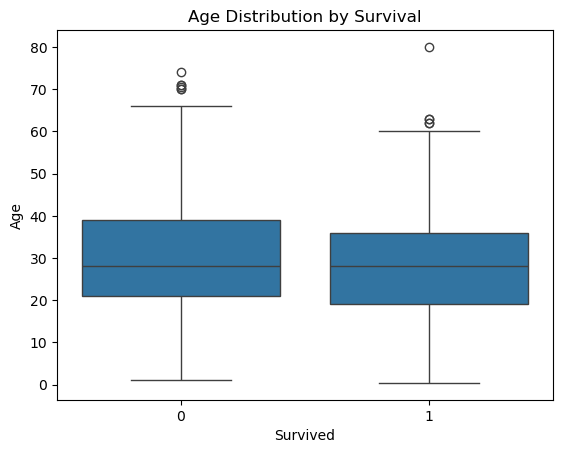

In [20]:
# Boxplot – Age vs Survival
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age Distribution by Survival")
plt.show()

# Scatterplot

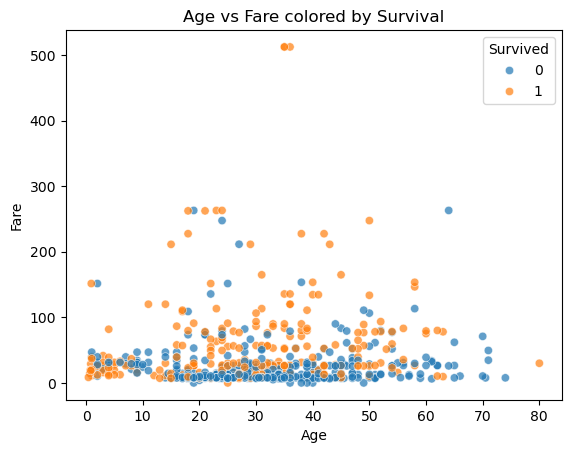

In [21]:
# Scatterplot – Age vs Fare (colored by Survival)
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, alpha=0.7)
plt.title("Age vs Fare colored by Survival")
plt.show()

# Countplot

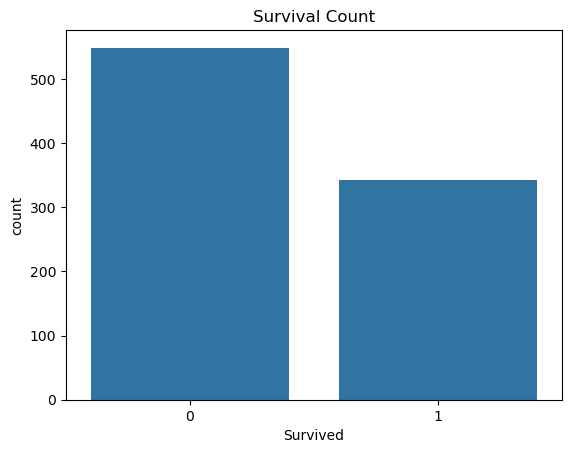

In [22]:
# Countplot – Survived
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()